# Домашняя работа 2. Логистическая регрессия.

### Оценивание и штрафы

Максимальная оценка — 10 баллов. Еще есть 2 бонусных балла, которые можно добавить к любым домашкам или проверочным.

Не списывайте, иначе всем участникам обнулим :)

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка: 12**

In [1]:
print('Всем удачи!👒')

Всем удачи!👒


In [2]:
from __future__ import annotations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Часть 1. Логрег своими руками (5.5 балла)

**Задание 1 (5 баллов)**. Реализуйте логистическую регрессию, обучаемую с помощью:
- градиентного спуска **(2.5 балла)**

- стохастического градиентного спуска **(2.5 балла)**

Во всех пунктах необходимо соблюдать два условия:
- Циклы можно использовать только для итераций градиентного спуска;
- В качестве критерия останова необходимо использовать (одновременно):

    - проверку на евклидову норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$), задаваемого параметром `tolerance`;
    - достижение максимального числа итераций (например, 10000), задаваемого параметром `max_iter`.

Чтобы проследить, что оптимизационный процесс действительно сходится, добавим атрибут класса `loss_history`. В нём после вызова метода `fit` должны содержаться значения функции потерь для всех итераций градиентного спуска, начиная с нулевой.

Инициализировать веса можно случайным образом или нулевым вектором.

Далее предполагается, что вы используете собственную реализацию логистической регрессии.
Если с написанием класса возникли проблемы, используйте реализацию sklearn, чтобы не терять баллы за остальные задания.

В части 2 и далее мв бы всем советовали использовать реализацию sklearn.

In [3]:
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, gd_type: str = 'stochastic', tolerance: float = 1e-4, 
                 max_iter: int = 1000, eta: float = 1e-2,
                 w0: np.array = None) -> None:
        """
        Args:
          gd_type: Type of gradient descent ('full' or 'stochastic'). 
          
          tolerance: Threshold for stopping gradient descent.
          
          max_iter: Maximum number of steps in gradient descent.
          
          eta: Learning rate.
          
          w0: Array of shape d (d — number of weights to optimize).
              Initial weights.
        """
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.eta = eta
        self.w0 = w0
        self.w = None
        self.loss_history = None 
    
    def fit(self, X: np.array, y: np.array) -> LogReg:  
    
        """ 
        Returns: 
          self: Fitted classsifier.  
        """
        self.loss_history = []
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  
        
        self.d = np.shape(X) #Определяем количество фичей
        self.w0 = np.zeros(self.d[1]) #Делаем первоначальынй вектор весов
        self.w = self.w0
        
        self.num_of_it = 0
        while self.num_of_it != self.max_iter: #Критерий остановки по итерациям
            self.w_previous = self.w
            self.w = self.calc_gradient(X, y)
            self.loss_history.append(self.calc_loss(X, y)) #через np append сделать не получилось, знаю, что это не самый эффективный способ
            if np.linalg.norm(np.array(self.w_previous) - np.array(self.w)) < self.tolerance: #Критерий остановки по норме
                return self.w
            self.num_of_it += 1
        return self.w / np.linalg.norm(self.w)
    
    
    def predict_proba(self, X: np.array) -> np.array:
        
        """Calculate probability of positive and negative class for each observation.
        
        Args:
          X: Array of shape (n, d).
             Data.
        
        Returns: 
             Array of shape (n, 2).
             Predicted probabilities.
        """
        if self.w is None:
            raise Exception('Not trained yet')
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        
        return np.transpose(np.array((1 / (1 + np.exp(-np.dot(X, self.w))), 1 - 1 / (1 + np.exp(-np.dot(X, self.w))))))  
        
                               
    def predict(self, X: np.array) -> np.array:    
        """Predict class for each observation.
        
        Args:
          X: Array of shape (n, d).
             Data.
        
        Returns: 
             Array of shape (n,).
             Predicted class labels.  
        """
        if self.w is None:
            raise Exception('Not trained yet')
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        
        return np.around(self.predict_proba(X)[:, 0]) #Округляем в сторону 1 или 0
           
    
    def calc_gradient(self, X: np.array, y: np.array) -> np.array:
                                                  
        """Calculate gradient of loss function after each iteration.
        
        Args:
          X: Array of shape (n, d), n can be equal to 1 if 'stochastic'.
          y: Array of shape (n,).
        
        Returns:
          Array of shape (d,).
          Gradient of loss function after current iteration.
        """
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
                                      
        if self.gd_type == 'stohastic':
            randnum = np.random.randint(self.d[0])
            self.w = self.w - self.eta * np.dot((self.predict_proba(X)[:, 0][randnum] - y[randnum]), X[randnum])
            return self.w        
                                      
        elif self.gd_type == 'full':
            self.w = self.w - self.eta * np.dot((self.predict_proba(X)[:, 0] - y), X)                     
            return self.w   
        
        
    def calc_loss(self, X: np.array, y: np.array) -> float:
        """Calculate value of loss function after each iteration.
        
        Args:
          X: Array of shape (n, d).
          y: Array of shape (n,).
        
        Returns:
          Value of loss function after current iteration.
        """ 
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        
        return np.mean(- y * np.log(self.predict_proba(X)[:, 0]) - (1 - y) * np.log(1 - self.predict_proba(X)[:, 0]))
            
        

## Сгенерируем синтетические данные.

In [9]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

**Задание 2 (0.5 балла).** Обучите логистическую регрессию на синтетических данных. Нарисуйте изменение лосса во время обучения.

In [10]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

lg = LogReg()
lg.__init__(gd_type = 'stohastic')
lg.fit(X_train, y_train)

array([ 0.32247936,  0.37026066,  0.08618894,  0.18782731,  0.03760696,
       -0.07967122,  0.01917626, -0.30680961, -0.23131174,  0.0522283 ])

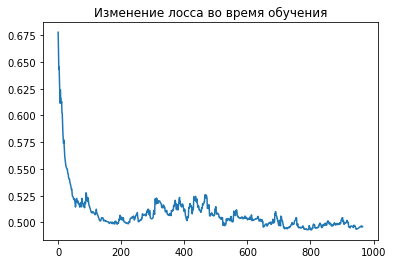

In [11]:
loss_values = lg.loss_history
x = np.arange(len(loss_values))
plt.plot(x, loss_values)
plt.title('Изменение лосса во время обучения')
plt.show()

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

ROC-AUC: 0.844652935421483
PR-AUC: 0.806657652231052


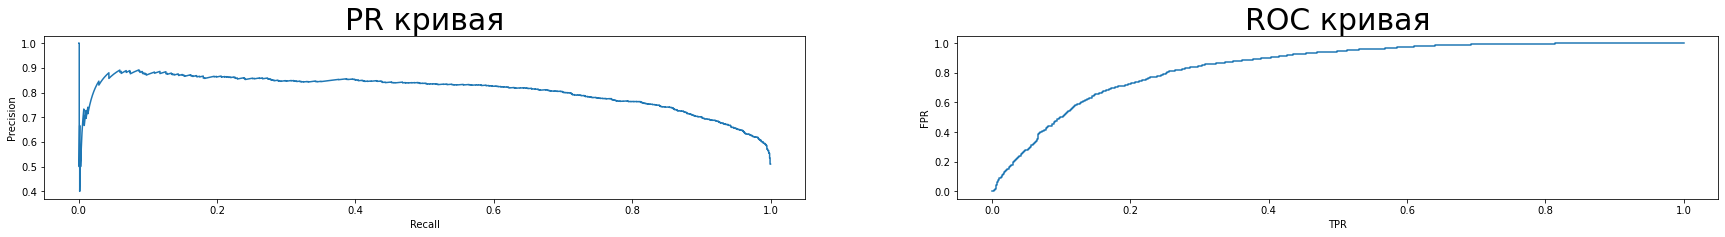

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from sklearn.metrics import roc_curve, auc, precision_recall_curve

fig, ax = plt.subplots(1, 2, figsize=(30, 3))

y_test_proba_ = lg.predict_proba(X_test)[:, 0]

precision, recall, _ = precision_recall_curve(y_test, y_test_proba_)
ax[0].plot(recall, precision)
ax[0].set(ylabel='Precision', xlabel = 'Recall')
ax[0].set_title('PR кривая', size = 30)

fpr, tpr, _ = roc_curve(y_test, y_test_proba_)
ax[1].plot(fpr, tpr)
ax[1].set(ylabel='FPR', xlabel = 'TPR')
ax[1].set_title('ROC кривая', size = 30)

print('ROC-AUC:', auc(fpr, tpr))
print('PR-AUC:', auc(recall, precision))

In [13]:
#Самописная модель работает почти так же по качеству, как и обычная
#Получились хорошие значения ROC-AUC и PR-AUC

#Единственная проблема в модели - в записи loss history при full спуске
#Так как в logloss используется логарифм и при полном спуске частенько возникают нули из-за более грубого спуска, то значение функции logloss принимает значение Nan, поэтому история не сохраняется как нужно 

## Часть 2. Работа с категориальными признаками (2.5 балла)

В этой части мы научимся обрабатывать категориальные переменные. Как вы уже знаете, закодировать их в виде столбика чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть, но модель попробует его выучить). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Подготовка данных.__

Загрузим данные [UCI Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing). Этот датасет содержит информацию о маркетинговой кампании какого-то банка, объектом в нем является телефонный звонок потенциальному клиенту с предложением некоторой услуги (утверждается, что это краткосрочный депозит), целевой переменной — ответ клиента (согласился ли он открыть депозит?). В качестве признакового описания используются характеристики клиента (образование, брак и т.д.), данные о звонке и различные экономические индикаторы — более подробная информация на страничке с датасетом.

In [14]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip bank-additional.zip
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

--2022-11-13 18:40:42--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: 'bank-additional.zip.1'

bank-additional.zip 100%[===================>] 434.15K   385KB/s    in 1.1s    

2022-11-13 18:40:44 (385 KB/s) - 'bank-additional.zip.1' saved [444572/444572]

Archive:  bank-additional.zip
replace bank-additional/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [15]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


__Задание 3 (0.5 балла).__ Разделите выборку на обучающую и тестовую в соотношении 3:1. Зафиксируйте `random_state=777`, укажите значение параметра `stratify`. Один из столбцов (помимо таргета :) ) стоит сразу выкинуть из обучающей выборки. Какой? Не отказывайте себе. 



In [16]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
y = df['y']
X = df.iloc[:, ~df.columns.isin(['y', 'duration'])]

In [17]:
#Следует избавиться от столбца duration, это сказано в описании к датасету
#Это верно, так как его значение неизвестно до проведения звонка, а после проведения звонка 
#значение y стновится известно. Также он имеет сильное влияние на таргет в том случае, 
#когда равен 0, ведь тогда таргет однозначно равен 'no'

In [18]:
#нам разрешили не пользоваться pipelineами, поэтому я решил сделать без них
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

for i in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']:
    X[i] = enc.fit_transform(df[[i]])

y = enc.fit_transform(df[['y']])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=777, stratify=y)

/var/folders/9d/gc4t49ts0js05tjpd78zspl40000gp/T/ipykernel_11867/1776165044.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = enc.fit_transform(df[[i]])
/var/folders/9d/gc4t49ts0js05tjpd78zspl40000gp/T/ipykernel_11867/1776165044.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = enc.fit_transform(df[[i]])
/var/folders/9d/gc4t49ts0js05tjpd78zspl40000gp/T/ipykernel_11867/1776165044.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [19]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(X_train, y_train)

/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
from sklearn.metrics import auc, precision_recall_curve

y_test_proba_ = logr.predict_proba(X_test)[:, 1] #выбираем вероятности класса 1
precision, recall, _ = precision_recall_curve(y_test, y_test_proba_)
print('PR-AUC:', auc(recall, precision))

PR-AUC: 0.41561825470869895


Закодируйте категориальные признаки с помощью `OrdinalEncoder`. Посчитайте качество (в этом задании будем работать c `AUC-PR`) при применении логистической регрессии. Здесь и далее для реализации последовательности этих действий (обработка признаков + обучение модели) используйте пайплайны. Замерьте время, потребовавшееся на обучение модели (с учетом кодирования признаков).

__Вопрос__: почему в данном задании мы выбрали метрикой именно `AUC-PR`, а не, к примеру, `AUC-ROC`?

__Ваш ответ__:

In [21]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#Потому что датасет несбалансированный (где-то 12% yes). PR AUC более чуствителен к 
#улучшениям positive класса т. к. ROC AUC смотрит на True positive values и False positive 
#values, а PR AUC на TPR и positive predictive value, а нам тут интересны случаи как раз когда случился yes
#Более развернутое объяснение есть в статье: https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc

__Задание 4 (0.5 балла).__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели. Измерьте время, потребовавшееся на кодирование категориальных признаков и обучение модели.



In [22]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
#формируем X, сначала оставляя в нем числовые признаки, а потом добавляя перекодированные категориальные
X = df.iloc[:, df.columns.isin(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])]
for i in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']:
    X = np.hstack([X, enc.fit_transform(df[[i]]).toarray()])

y = df[['y']]
enc = OrdinalEncoder() #с таргетом избыточно применять one-hot кодирование
y = enc.fit_transform(y) 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=777, stratify=y)

In [23]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_test_proba_ = logr.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_test_proba_)
print('PR-AUC:', auc(recall, precision))

PR-AUC: 0.43512369330026474


Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирования категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 5 (0.5 балла).__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущими экспериментами (с учетом кодирования признаков). Заметили ли вы что-то интересное?

In [25]:
df1 = df.copy(deep = True)

In [26]:
#реализуем метод с помощью циклов, в которых значения будут заменяться ровно по формуле
for i in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']:
    for j in df[i].unique():
        coun = 0
        couny = 0
        for k in range(len(df[i])):
            if df[i][k] == j:
                coun += 1
                couny += y[k] #тут y принимает значение или 0 или 1
        df1[i] = df1[i].replace({j: couny / coun})

In [27]:
X = df1.iloc[:, ~df1.columns.isin(['y', 'duration'])]

y = df[['y']]
enc = OrdinalEncoder()
y = enc.fit_transform(y)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=777, stratify=y)

In [29]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_test_proba_ = logr.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_test_proba_)
print('PR-AUC:', auc(recall, precision))

PR-AUC: 0.41141521239480516


In [31]:
#Стало хуже по качеству, времени заняло побольше, но памяти данные занимают сильно меньше

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем «утечку» целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении счетчика для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Вносить шум в посчитанные признаки. 

__Задание 6 (0.5 балла).__ Реализуйте корректное вычисление счётчиков самым простым способом — добавлением шума к значениям (постарайтесь найти баланс между борьбой с переобучением и сохранением полезности признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы.
Какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием можно отметить?

In [32]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df2 = df1.copy(deep = True)

In [33]:
pd.options.mode.chained_assignment = None #чтобы компьютер дал закончить программу

In [34]:
for i in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']:
    for k in range(len(df2[i])):
        shum = np.random.randint(0, 2)
        df2[i][k] += shum * 0.25 * df2[i][k]
#Это выполняется 1,5-2 минуты, добавляем к каждому значению из категориальных признаков 25% от него с вероятностью 0.5

In [35]:
X = df2.iloc[:, ~df2.columns.isin(['y', 'duration'])]

y = df[['y']]
enc = OrdinalEncoder()
y = enc.fit_transform(y)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=777, stratify=y)

In [37]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_test_proba_ = logr.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_test_proba_)
print('PR-AUC:', auc(recall, precision))

PR-AUC: 0.4172951906859748


In [39]:
#Счетчики с шумом работают лучше, чем без него

In [40]:
#В моей реализации счетчики с шумом работают сильно медленнее one hot кодирования и дают худший результат. Но при этом данные занимают меньше места и с ними проще работать

__Задание 7 (0.5 балла).__ В данных имеется признак «возраст клиента». Сейчас мы интерпретируем его как числовой, что в общем случае для линейной модели может быть неверной гипотезой. Тем не менее, у этого признака есть довольно много уникальных значений (сколько?), поэтому применять к нему one-hot кодирование может оказаться излишним. Попробуйте закодировать возраст с помощью счетчиков. Стало ли лучше?



In [47]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print('Уникальных значений:', len(df['age'].unique()))

Уникальных значений: 78


In [48]:
df3 = df2.copy(deep = True)

In [49]:
for j in df3['age'].unique():
        coun = 0
        couny = 0
        for k in range(len(df3['age'])):
            if df3['age'][k] == j:
                coun += 1
                couny += y[k]
        df3[i] = df3[i].replace({j: couny / coun})
#Сначала кодируем просто по счетчикам, потом добавляем шум для повышения качества        
for k in range(len(df3['age'])):
        shum = np.random.randint(0, 2)
        df3['age'][k] = df3['age'][k] + shum * 0.25 * (couny / coun)

In [50]:
X = df3.iloc[:, ~df3.columns.isin(['y', 'duration'])]

y = df[['y']]
enc = OrdinalEncoder()
y = enc.fit_transform(y)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=777, stratify=y)
logr = LogisticRegression()
logr.fit(X_train, y_train)
y_test_proba_ = logr.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_test_proba_)
print('PR-AUC:', auc(recall, precision))

/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PR-AUC: 0.41731234827885877


/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
#По сравнению с прошлой реализацией особо лучше не стало

Можно пойти и в обратную сторону. У нас есть признаки «месяц и день недели» для звонка. Попробуйте интерпретировать их как числовые (месяц от 0 до 12, дни недели от 0 до 4). Стало ли лучше в этот раз?

In [55]:
enc = OrdinalEncoder()
df2[['month']] = enc.fit_transform(df[['month']])
df2[['day_of_week']] = enc.fit_transform(df[['day_of_week']])

In [56]:
X = df2.iloc[:, ~df2.columns.isin(['y', 'duration'])]

y = df[['y']]
enc = OrdinalEncoder()
y = enc.fit_transform(y)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=777, stratify=y)
logr = LogisticRegression()
logr.fit(X_train, y_train)
y_test_proba_ = logr.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_test_proba_)
print('PR-AUC:', auc(recall, precision))

/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PR-AUC: 0.40551582520006035


/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
#В этот раз стало хуже

## Часть 3. Оценка экономического эффекта модели (2 балла)

В данной части мы займемся тем, что от вас скорее всего потребуется на реальной работе. А именно: мы будем считать некоторые метрики и с их помощью попытаемся настроить модель на максимизацию _прибыли_. Разумеется, здесь будет сделано множество упрощающих жизнь допущений, но обо всем по порядку. 

__Задание 8 (1 балл).__ Допустим, работники вашего колл-центра получают за один звонок клиенту 1 доллар. При согласии клиента на предлагаемые условия он принесет в банк 10 долларов.


=== Краткий курс экономики от ФКН 👒===

   - Если вы всё прослушали на экономике, то напомним, что выручка — это сколько денег нам принесли клиенты, а прибыль — выручка за вычетом расходов на зарплату и прочее.

=== Конец краткого курса экономики от ФКН 👒 ===

Загрузите данные о телемаркетинге из предыдущего блока заданий. В этой части не нужно делить выборку - мы будем использовать кросс-валидацию. Используйте 5 фолдов, сделайте `shuffle=True, random_state=500`. По кросс-валидации у вас получится 5 вариантов обучающей и тестовой выборки. Обучите логистическую регрессию на каждой обучающей выборке (воспользуйтесь one-hot для категориальных признаков, гиперпараметры оставьте со значениями по умолчанию) и сделайте предсказания для соответствующих тестовых выборок. Допустим, всем положительным прогнозам ваши сотрудники решили позвонить. Посчитайте на всех тестовых выборках выручку и усредните. Сколько денег вы в среднем заработаете? Также вычислите стандартное отклонение.

Сколько из заработанных денег придётся отдать операторам вашего колл-центра?

In [59]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=500)

In [60]:
enc = OneHotEncoder()

X = df.iloc[:, df.columns.isin(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])]

for i in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']:
    X = np.hstack([X, enc.fit_transform(df[[i]]).toarray()])
    
y = df[['y']]
enc = OrdinalEncoder()
y = enc.fit_transform(y)

In [62]:
revenue_total = []
expenses = [] #затраты на обзвон

for train_index, test_index in kf.split(X): #Код с оффициального сайта sklearn
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    logr = LogisticRegression()
    logr.fit(X_train, y_train)
       
    expenses.append(np.sum(logr.predict(X_test) == 1)) #Сразу вычисляем скольким людям мы будем звонить, это и будут затраты
             
    revenue_total.append(10 * np.sum((np.array(y_test).T + np.array(logr.predict(X_test))) == 2)) #Мы получаем деньги только в случае двойного совпадения: мы позвонили человеку и он хочет купить, с каждого получаем по 10 

/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

In [63]:
print('Тогда средняя выручка на каждый фолд будет равна:', np.mean(revenue_total))
print('Стандартное отклонение:', np.std(revenue_total))
print('Операторам из колл центра в среднем придется отдать:', np.mean(expenses))

Тогда средняя выручка на каждый фолд будет равна: 1842.0
Стандартное отклонение: 217.56838005555863
Операторам из колл центра в среднем придется отдать: 267.0


Внесем некоторую долю случайности. Пусть теперь согласный на условия клиент будет приносить не 10 долларов, а случайную величину, равномерно распределенную в интервале $[0;20)$. Проделайте все те же самые действия. Для имитации реальной ситуации **НЕ** фиксируйте `random_seed` при подсчете выручки с клиента. Что получилось?

In [66]:
revenue_total = []
expenses = []
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    logr = LogisticRegression()
    logr.fit(X_train, y_train)
    
    expenses.append(np.sum(logr.predict(X_test) == 1)) #Сразу вычисляем скольким людям мы будем звонить, это и будут затраты
       
    revenue_total.append(np.sum(np.random.uniform(0, 20, np.sum((np.array(y_test).T + np.array(logr.predict(X_test))) == 2)))) 
    #np random uniform создает вектор с нужным нам распределением со значениями из интервала, размер вектора - кол-во двойных совпадений

/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

In [67]:
print('Тогда средняя выручка на каждый фолд будет равна:', np.mean(revenue_total))
print('Стандартное отклонение:', np.std(revenue_total))
print('Операторам из колл центра в среднем придется отдать:', np.mean(expenses))

Тогда средняя выручка на каждый фолд будет равна: 1820.5784695989041
Стандартное отклонение: 317.0100266549799
Операторам из колл центра в среднем придется отдать: 267.0


In [68]:
#Выручка колеблется около прошлого значения: иногда она слегка выше, иногда слегка ниже

Настройте по кросс-валидации коэффициент регуляризации модели для максимизации прибыли (считайте как случайную величину выше). Удалось ли получить какой-то выигрыш? При каком коэффициенте регуляризациии прибыль максимальна? Постройте график зависимости ожидаемой прибыли от коэффициента, также укажите стандартные отклонения (вам поможет `plt.errorbar`).

In [69]:
#Этот код работает долговато из-за количества фолдов
profit = []
kf = KFold(n_splits=100, shuffle=True, random_state=500)

i = 0 #Будем подбирать коэф регуляризации из диапазона 0.1:10

for train_index, test_index in kf.split(X):
    
    i += 0.1
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    logr = LogisticRegression(C = i) #указываем коэф регуляризации
    logr.fit(X_train, y_train)
         
    profit.append(np.sum(np.random.uniform(0, 20, np.sum((np.array(y_test).T + np.array(logr.predict(X_test))) == 2))) - np.sum(logr.predict(X_test) == 1))     
    #добавляем прибыль как разницу между выручкой и затратами

/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

In [70]:
print('Максимальная прибыль достигается при коэффициенте регуляризации', profit.index(np.max(profit)) / 10)

Максимальная прибыль достигается при коэффициенте регуляризации 2.7


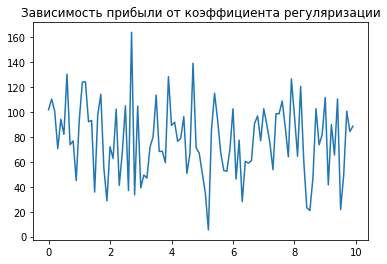

In [71]:
coefs = np.arange(0, 10, 0.1)
plt.plot(coefs, profit)
plt.title('Зависимость прибыли от коэффициента регуляризации')
plt.show()
#Как видим, настраивать коэф регуляризации не очень полезно

In [72]:
print('Стандартное отклонение прибыли равно:', np.std(profit))

Стандартное отклонение прибыли равно: 29.49638252881702


__Задание 9 (1 балл).__ Выше мы уже описали примерную экономическую модель вашей задачи. Как вы считаете, что для этого бизнеса важнее — хороший precision или recall модели? Почему?

__Ответ:__ Важнее recall, потому что нам важно отобрать всех согласных на оформление услуг. Каждый клиент в 90% случаев принесет компании положительную прибыль, что связано с небольшими затратами на лицо



Вспомним, что на самом деле логистическая регрессия предсказывает вероятности положительного класса для объекта. Возможно, путем настройки порога бинаризации этих вероятностей мы сможем получить какой-то выигрыш? Проверьте ваши рассуждения выше с помощью настройки порога бинаризации на кросс-валидации для максимизации прибыли. Воспользуйтесь сеткой от 0 до 1 с шагом 0.01. Напомним, что снижение порога дает нам более высокий recall и более низкий precision, и наоборот.

In [73]:
profit = []
kf = KFold(n_splits=100, shuffle=True, random_state=500)

i_ = 0 #это будет порогом бинаризации

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    logr = LogisticRegression()
    logr.fit(X_train, y_train)
    
    thresh = logr.predict_proba(X_test)[:, 1]
    y_predict_class = [1 if prob > i_ else 0 for prob in thresh]
          
    profit.append(np.sum(np.random.uniform(0, 20, np.sum((np.array(y_test).T + np.array(y_predict_class)) == 2))) - np.sum(y_predict_class == 1))    
    #В прибыли теперь y_predict_class вместо дефолтного logr.predict    
    i_ += 0.01

/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

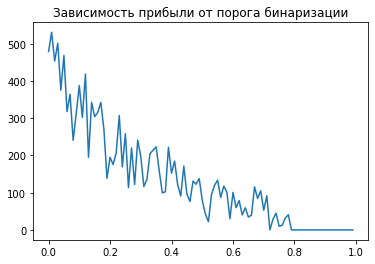

In [74]:
coefs_2 = np.arange(0, 1, 0.01)
plt.plot(coefs_2, profit)
plt.title('Зависимость прибыли от порога бинаризации')
plt.show()

In [75]:
print('Максимальная прибыль достигается при пороге бинаризации', profit.index(np.max(profit)) / 100)

Максимальная прибыль достигается при пороге бинаризации 0.01


In [76]:
#Выигрыш действительно есть

Каковы значения precision и recall на выбранном пороге? Оцените по кросс-валидации. Также вычислите стандартное отклонение.

In [77]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
kf = KFold(n_splits=10, shuffle=True, random_state=500) #Для скорости будем использовать 10 фолдов, обычно столько и используют
precision = []
recall = []
i_ = profit.index(np.max(profit)) / 100

for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    logr = LogisticRegression()
    logr.fit(X_train, y_train)
    
    thresh = logr.predict_proba(X_test)[:, 1]
    y_predict_class = [1 if prob > i_ else 0 for prob in thresh]
      
    TP = np.sum((np.array(y_test).T + np.array(y_predict_class)) == 2)
    FP = np.sum(np.array(y_predict_class) == 1) - TP
    
    
    y_predict_class_falsen = [1 if clas == 0 else 0 for clas in y_predict_class]
    y_test_falsen = [1 if clas == 0 else 0 for clas in y_test]
    
    TN = np.sum((np.array(y_test_falsen) + np.array(y_predict_class_falsen)) == 2)
    FN = np.sum(np.array(y_predict_class_falsen) == 1) - TN
 
    
    precision.append(TP / (TP + FP))
    recall.append(TP / (TP + FN))

/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

In [78]:
print('Среднее значение recall на выбранном пороге:', np.mean(recall))
print('Среднее значение precision на выбранном пороге:', np.mean(precision))
print('Стандартное отклонение recall:', np.std(recall))
print('Стандартное отклонение precision:', np.std(precision))

Среднее значение recall на выбранном пороге: 1.0
Среднее значение precision на выбранном пороге: 0.11270397408467137
Стандартное отклонение recall: 0.0
Стандартное отклонение precision: 0.004512142835746561


Как вы, вероятно, уже поняли, ваша модель склоняется к более высокому recall. Попробуйте оценить качество модели с помощью `PR-AUC` в зоне recall $\geq$ 0.5. Сделайте это следующим образом - выберите только те пороги, на которых достигается необходимый recall, затем интерпретируйте отсеченный в единичном квадрате прямоугольник как новый единичный квадрат и посчитайте площадь под отсеченной кривой. 

In [79]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
kf = KFold(n_splits=100, shuffle=True, random_state=500)
recall = []
i_ = 0 #это пороги

for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    logr = LogisticRegression()
    logr.fit(X_train, y_train)
    
    thresh = logr.predict_proba(X_test)[:, 1]
    y_predict_class = [1 if prob > i_ else 0 for prob in thresh]
        
    TP = np.sum((np.array(y_test).T + np.array(y_predict_class)) == 2)
        
    y_predict_class_falsen = [1 if clas == 0 else 0 for clas in y_predict_class]
    y_test_falsen = [1 if clas == 0 else 0 for clas in y_test]
    
    TN = np.sum((np.array(y_test_falsen) + np.array(y_predict_class_falsen)) == 2)
    FN = np.sum(np.array(y_predict_class_falsen) == 1) - TN
   
    recall.append(TP / (TP + FN))
    i_ += 0.01

/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

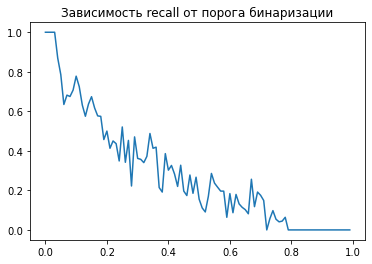

In [80]:
coefs_2 = np.arange(0, 1, 0.01)
plt.plot(coefs_2, recall)
plt.title('Зависимость recall от порога бинаризации')
plt.show()

In [81]:
vybran_porog = []
for i in range(len(recall)):
    if recall[i] >= 0.5:
        vybran_porog.append(coefs_2[i])
#Этот шаг может быть неоптимальным и цикл может быть избыточным, но ограничений на использование циклов в этой части нету и я решил оставить как есть

In [82]:
kf = KFold(n_splits=len(vybran_porog), shuffle=True, random_state=500) #Количество фолдов равно количеству порогов
porog_index = 0 #Этим индексов будем проходиться по всем элементам массива с выбранными порогами
recall = []
precision = []

for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    logr = LogisticRegression()
    logr.fit(X_train, y_train)
    
    thresh = logr.predict_proba(X_test)[:, 1]
    y_predict_class = [1 if prob > vybran_porog[porog_index] else 0 for prob in thresh]
     
    TP = np.sum((np.array(y_test).T + np.array(y_predict_class)) == 2)
    FP = np.sum(np.array(y_predict_class) == 1) - TP
    
    
    y_predict_class_falsen = [1 if clas == 0 else 0 for clas in y_predict_class]
    y_test_falsen = [1 if clas == 0 else 0 for clas in y_test]
    
    TN = np.sum((np.array(y_test_falsen) + np.array(y_predict_class_falsen)) == 2)
    FN = np.sum(np.array(y_predict_class_falsen) == 1) - TN
 
    
    precision.append(TP / (TP + FP))
    recall.append(TP / (TP + FN))
    
    porog_index += 1

/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

In [83]:
#Здесь мы еще раз отбираем элементы с recall >= 0.5 на тот случай, если раньше была допущена ошибка (такое действительно может случиться особенно на граничных значениях recall у 1-2 порогов)
recall_ = []
precision_ = precision.copy()
for i in recall:
    if i >= 0.5:
        recall_.append(i)
    else:
        precision_.remove(precision_[recall.index(i)])

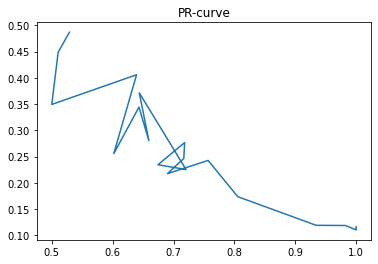

In [84]:
plt.plot(recall_, precision_)
plt.title('PR-curve')
plt.show()

In [85]:
print('Тогда AUC-PR будет примерно равен', 2 * np.trapz(recall_, precision_))
#Мы берем площадь под графиком (оси инверсированы, потому что в другом случае получается отрицательно число, но ответа перемена осей не меняет)
#Домножаем ее на два, т. к. интерпретируем прямоугольник как квадрат (мы как бы расстянули фигуру в два раза)

Тогда AUC-PR будет примерно равен 0.49908583223691744


In [86]:
#Значение AUC-PR в 0.5 демонстрирует непригодность классификации, это все равно что мы бы использовали какой-то случайный классификатор
#Но стоит отметить, что мы брали лишь половину графика PR, поэтому это непригодность модели не может быть итоговым вердиктом на этой стадии

__Бонус (1 балл):__ чтобы получить 1 балл, вставьте что угодно в ячейку ниже. Даже можно не ходить в музей.

(Бонус может получить только тот, кто решил хотя бы одно задание).

In [88]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

print('( ͡◉ ͜ʖ ͡◉)')

( ͡◉ ͜ʖ ͡◉)
